In [1]:
import os
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
import numpy as np
import json
import geopandas

In [2]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
#https://worldpopulationreview.com/world-cities
df = pd.read_csv('new_world.csv')
df = df.drop('Unnamed: 0', axis=1)

In [4]:
world_map = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
list_colors = []
for i in range(len(df)):
    if df.at[i, 'AQI'] >= 250:
        list_colors.append('maroon')
    elif df.at[i, 'AQI'] >= 150:
        list_colors.append('orange')
    else:
        list_colors.append('white')
df['color'] = pd.Series(list_colors)

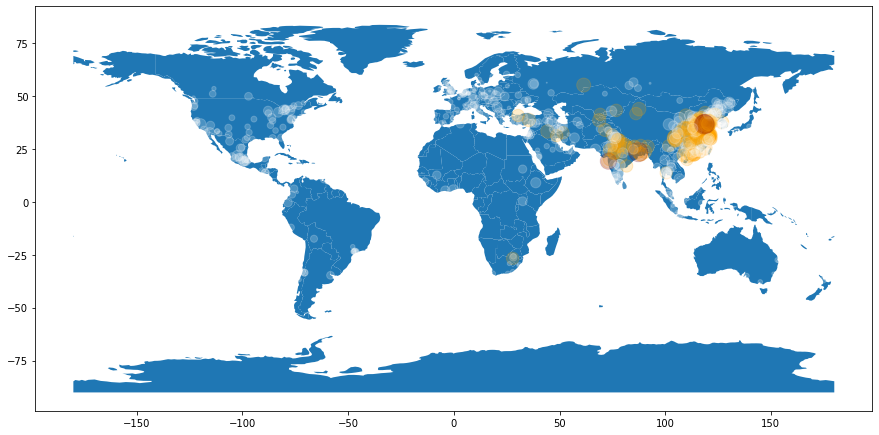

In [5]:
ax = world_map.plot(figsize=(15, 20))
plt.scatter(df['Longitude'], df['Latitude'], marker='o', c=df.color, s=df['AQI'], alpha=0.2)

In [6]:
df_c = pd.read_csv('csvData.csv')
df_c = df_c[df_c['Name'].isin(list(df['City']))]

In [7]:
len(df_c[df_c['Country']=='India']), len(df_c[df_c['Country']=='China'])

(52, 221)

In [8]:
df.columns

Index(['City', 'AQI', 'City Index', 'Latitude', 'Longitude', 'URL',
       'Population', 'Dominant', 'Dew', 'Humidity', 'Pressure', 'PM25',
       'Temperature', 'Wind', 'CO', 'N02', 'SO2', 'Ozone', 'PM10', 'UV',
       'color'],
      dtype='object')

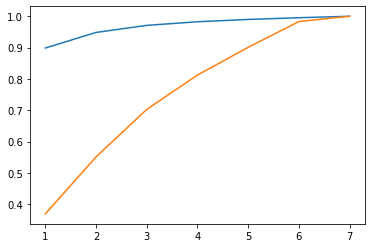

In [9]:
df_numeric = df[['Dew', 'PM25','CO', 'N02', 'SO2', 'Ozone', 'PM10']]
list_num_pc = np.arange(len(df_numeric.columns)) + 1
pc_ev = []
for num in list_num_pc:
    pca = PCA(n_components=num)
    transformed = pd.DataFrame(pca.fit_transform(df_numeric))
    pc_ev.append(sum(pca.explained_variance_ratio_))
plt.plot(list_num_pc, pc_ev)
list_num_pc = np.arange(len(df_numeric.columns)) + 1
pc_ev = []
for num in list_num_pc:
    scaler = StandardScaler()
    scaled = scaler.fit_transform(df_numeric)
    pca = PCA(n_components=num)
    transformed = pd.DataFrame(pca.fit_transform(scaled))
    pc_ev.append(sum(pca.explained_variance_ratio_))
plt.plot(list_num_pc, pc_ev)

In [10]:
df_numeric

,Dew,PM25,CO,N02,SO2,Ozone,PM10
0,18.3,113,4.5,14.9,1.5,13.0,38
1,13.0,157,0.0,0.0,0.0,8.0,57
2,0.0,248,19.9,40.7,4.6,5.0,122
3,0.0,84,6.4,4.2,0.0,11.0,45
4,0.0,121,11.2,33.4,5.8,19.0,48
...,...,...,...,...,...,...,...
623,12.5,216,4.2,0.6,7.5,47.0,103
624,0.0,89,3.7,3.2,6.1,18.0,27
625,25.0,62,0.0,0.0,0.0,9.0,16
626,19.0,137,0.1,2.4,0.0,24.0,45


In [11]:
df_white = df[df['color']=='white']
df_white

,City,AQI,City Index,Latitude,Longitude,URL,Population,Dominant,Dew,Humidity,...,PM25,Temperature,Wind,CO,N02,SO2,Ozone,PM10,UV,color
0,Tokyo,23,5573,35.641463,139.698171,https://aqicn.org/city/meguro,37393128,NaN,18.3,79.1,...,113,22.1,2.5,4.5,14.9,1.5,13.0,38,0,white
3,Sao Paulo,46,359,-23.544846,-46.627676,https://aqicn.org/city/brazil/sao-paulo/parque...,22043028,pm25,0.0,83.0,...,84,20.5,2.0,6.4,4.2,0.0,11.0,45,2,white
4,Mexico City,91,404,19.424610,-99.119594,https://aqicn.org/city/mexico/mexico/merced,21782378,pm25,0.0,54.0,...,121,13.8,3.0,11.2,33.4,5.8,19.0,48,0,white
6,Beijing,89,1451,39.954592,116.468117,https://aqicn.org/city/beijing,20462610,pm25,0.0,58.0,...,168,-2.0,0.5,4.6,24.7,2.1,2.0,68,0,white
8,Karachi,109,11790,24.841500,67.009100,https://aqicn.org/city/pakistan/karachi/us-con...,16093786,pm25,7.0,33.0,...,137,24.0,3.6,0.0,0.0,0.0,37.0,52,1,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,Kansas City,35,7357,39.104650,-94.570550,https://aqicn.org/city/usa/missouri/troost,505198,pm10,-1.0,25.0,...,30,19.0,3.0,0.0,13.9,1.5,11.0,10,0,white
624,Shuangyashan,74,7917,46.646509,131.159133,https://aqicn.org/city/shuangyashan,503179,pm25,0.0,40.9,...,89,-10.2,3.0,3.7,3.2,6.1,18.0,27,0,white
625,Kuantan,23,2592,3.819217,103.296550,https://aqicn.org/city/malaysia/pahang/indera-...,502866,NaN,25.0,88.0,...,62,27.0,2.0,0.0,0.0,0.0,9.0,16,0,white
626,Khon-Kaen,87,3688,16.445383,102.835250,https://aqicn.org/city/thailand/khonkaen,502594,pm25,19.0,48.0,...,137,31.0,1.5,0.1,2.4,0.0,24.0,45,0,white


In [12]:
df.columns

Index(['City', 'AQI', 'City Index', 'Latitude', 'Longitude', 'URL',
       'Population', 'Dominant', 'Dew', 'Humidity', 'Pressure', 'PM25',
       'Temperature', 'Wind', 'CO', 'N02', 'SO2', 'Ozone', 'PM10', 'UV',
       'color'],
      dtype='object')

In [13]:
scaler = StandardScaler()
scaled2 = scaler.fit_transform(df[['Latitude', 'Longitude',
       'Population', 'Dew', 'Humidity', 'Pressure', 'PM25',
       'Temperature', 'Wind', 'CO', 'N02', 'SO2', 'Ozone', 'PM10', 'UV']])
scaleddf = pd.DataFrame(scaled2, columns=['Latitude', 'Longitude',
       'Population', 'Dew', 'Humidity', 'Pressure', 'PM25',
       'Temperature', 'Wind', 'CO', 'N02', 'SO2', 'Ozone', 'PM10', 'UV'])
scaleddf['color'] = df['color']

In [14]:
train, test = train_test_split(scaleddf, stratify=df["color"], train_size=0.9)
train.head()

,Latitude,Longitude,Population,Dew,Humidity,Pressure,PM25,Temperature,Wind,CO,N02,SO2,Ozone,PM10,UV,color
475,0.802851,-0.595002,-0.441299,-0.421416,1.281484,-0.032898,-0.707458,-1.190863,-0.765015,-0.693422,-0.994558,-0.664970,0.252323,-0.678149,-0.538169,white
204,-0.108860,-0.937947,-0.183947,-0.421416,0.973891,-0.026340,-1.308895,0.252134,-0.129168,-0.680176,-0.782945,-0.521550,2.378742,-0.856517,-0.538169,white
255,0.398249,0.937549,-0.269398,-0.421416,-0.467402,-0.029957,0.673112,-0.474272,0.138557,-0.680176,-0.057416,0.260744,-0.962774,0.235991,-0.538169,white
532,-0.404302,0.309415,-0.461265,1.529121,0.117025,-0.293530,0.399731,1.714764,-0.380161,0.432506,-0.004513,0.091247,0.961129,-0.031562,0.756736,orange
126,-0.995150,-0.826258,0.092004,-0.156037,-1.662620,-0.029359,0.714119,0.870561,0.506679,-0.693422,-0.994558,-0.664970,0.454839,1.150130,2.051642,white


In [15]:
lr = LogisticRegression(max_iter=2000)
lr.fit(train[['Latitude', 'Longitude',
       'Population', 'Dew', 'Humidity', 'Pressure', 'PM25',
       'Temperature', 'Wind', 'CO', 'N02', 'SO2', 'Ozone', 'PM10', 'UV']], train["color"])

LogisticRegression(max_iter=2000)

In [16]:
test.copy()
test["predicted"] = lr.predict(test[['Latitude', 'Longitude',
       'Population', 'Dew', 'Humidity', 'Pressure', 'PM25',
       'Temperature', 'Wind', 'CO', 'N02', 'SO2', 'Ozone', 'PM10', 'UV']])
test.head()

/home/vaish/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Latitude,Longitude,Population,Dew,Humidity,Pressure,PM25,Temperature,Wind,CO,N02,SO2,Ozone,PM10,UV,color,predicted
150,0.306312,1.025376,-0.023217,-0.421416,-1.794445,-0.028682,0.577429,-0.336844,0.473213,0.339782,0.131524,0.091247,-0.861516,0.102214,-0.538169,white,white
182,0.823387,-0.613050,-0.135156,-0.421416,0.762970,-0.033601,0.331386,-0.758945,-0.698084,-0.680176,-0.994558,-0.664970,-0.962774,-0.031562,-0.538169,white,white
291,0.133967,-0.243191,-0.312568,-0.421416,-0.726658,-0.029567,-0.529761,0.674235,0.172023,0.194074,-0.782945,-0.169518,0.961129,-0.187635,-0.538169,white,white
48,-1.630026,0.689909,1.004851,2.763135,-0.168597,-0.031701,-0.625444,1.950355,0.138557,-0.031112,-0.994558,-0.404206,-0.456483,-0.633557,2.051642,white,white
402,0.097729,0.828740,-0.408896,-1.642161,-2.102038,-0.032039,0.823471,0.271767,-0.698084,-0.203313,-0.578890,-0.260785,-1.064032,0.436655,-0.538169,white,white


In [17]:
lr.coef_

array([[-0.13991025,  0.11618744, -0.61294156,  1.08770896, -0.68854841,
        -0.13089421,  0.91030627, -0.72886048, -0.93035479, -1.45268613,
         0.92447329,  0.26346909, -0.16447142,  0.06065083, -0.2596091 ],
       [ 0.30508036,  0.4654967 ,  0.32451388, -0.5814932 ,  0.64730714,
        -0.24358661,  0.49946113,  0.51627474,  0.45016354,  0.70285177,
        -0.24047907, -0.01127573,  0.10239106, -0.32091751,  0.07790105],
       [-0.16517011, -0.58168414,  0.28842768, -0.50621576,  0.04124127,
         0.37448082, -1.4097674 ,  0.21258574,  0.48019125,  0.74983436,
        -0.68399422, -0.25219336,  0.06208036,  0.26026668,  0.18170805]])

In [18]:
lr.classes_

array(['maroon', 'orange', 'white'], dtype=object)

In [19]:
white = lr.coef_[1]

In [20]:
features = list(test.columns)

In [21]:
len(features)

17

In [22]:
dict_plot = {}
for i in range(len(features)-2):
    dict_plot[features[i]] = white[i]

([<matplotlib.axis.YTick at 0x7f4e97041eb8>,
 [Text(0, 0, 'Latitude'),
  Text(0, 1, 'Longitude'),
  Text(0, 2, 'Population'),
  Text(0, 3, 'Dew'),
  Text(0, 4, 'Humidity'),
  Text(0, 5, 'Pressure'),
  Text(0, 6, 'PM25'),
  Text(0, 7, 'Temperature'),
  Text(0, 8, 'Wind'),
  Text(0, 9, 'CO'),
  Text(0, 10, 'N02'),
  Text(0, 11, 'SO2'),
  Text(0, 12, 'Ozone'),
  Text(0, 13, 'PM10'),
  Text(0, 14, 'UV')])

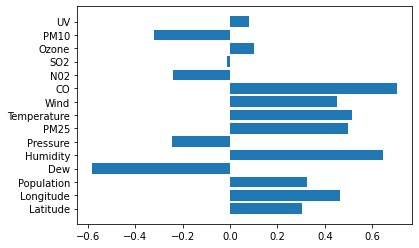

In [23]:
plt.barh(range(len(dict_plot)), dict_plot.values(), align='center')
plt.yticks(range(len(dict_plot)), dict_plot.keys())

In [24]:
df['color'].value_counts()

white     458
orange    159
maroon     11
Name: color, dtype: int64

In [27]:
coef = np.vstack((lr.coef_.T, lr.intercept_))
coef

array(['maroon', 'orange', 'white'], dtype=object)

In [42]:
test_v = test.drop('color', axis=1)
test_v = test_v.drop('predicted', axis=1)
test_v['one'] = 1

In [43]:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [44]:
scores = sigmoid(test_v.iloc[:,:] @ coef)
scores = scores.set_axis([c+"-score" for c in lr.classes_], axis=1)
scores.head()

,maroon-score,orange-score,white-score
150,0.043849,0.743715,0.882549
182,0.026258,0.691612,0.942972
291,0.001931,0.777865,0.993269
48,0.006675,0.685224,0.985582
402,0.047795,0.705050,0.892871


In [46]:
pd.concat((test, scores), axis=1)

,Latitude,Longitude,Population,Dew,Humidity,Pressure,PM25,Temperature,Wind,CO,N02,SO2,Ozone,PM10,UV,color,predicted,maroon-score,orange-score,white-score
150,0.306312,1.025376,-0.023217,-0.421416,-1.794445,-0.028682,0.577429,-0.336844,0.473213,0.339782,0.131524,0.091247,-0.861516,0.102214,-0.538169,white,white,0.043849,0.743715,0.882549
182,0.823387,-0.613050,-0.135156,-0.421416,0.762970,-0.033601,0.331386,-0.758945,-0.698084,-0.680176,-0.994558,-0.664970,-0.962774,-0.031562,-0.538169,white,white,0.026258,0.691612,0.942972
291,0.133967,-0.243191,-0.312568,-0.421416,-0.726658,-0.029567,-0.529761,0.674235,0.172023,0.194074,-0.782945,-0.169518,0.961129,-0.187635,-0.538169,white,white,0.001931,0.777865,0.993269
48,-1.630026,0.689909,1.004851,2.763135,-0.168597,-0.031701,-0.625444,1.950355,0.138557,-0.031112,-0.994558,-0.404206,-0.456483,-0.633557,2.051642,white,white,0.006675,0.685224,0.985582
402,0.097729,0.828740,-0.408896,-1.642161,-2.102038,-0.032039,0.823471,0.271767,-0.698084,-0.203313,-0.578890,-0.260785,-1.064032,0.436655,-0.538169,white,white,0.047795,0.705050,0.892871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,0.582953,-0.318444,-0.423396,0.507411,0.226880,-0.031961,-0.652782,-0.012906,-0.463825,0.167581,1.620370,0.052132,-0.051451,-0.566668,-0.538169,white,white,0.079109,0.528324,0.912224
506,0.463322,0.855843,-0.452125,-0.686796,1.404521,-0.029072,0.673112,-1.357740,-0.196100,-0.680176,0.668113,-0.586741,-1.064032,0.213694,-0.538169,orange,orange,0.113136,0.809217,0.648891
245,0.001971,-0.064426,-0.256219,1.303549,-0.256481,-0.028318,-0.297388,0.870561,0.138557,-0.693422,-0.994558,-0.664970,-0.355225,-0.388300,0.756736,white,white,0.022761,0.569799,0.970075
11,-3.643588,-1.507967,3.541572,-0.421416,-0.168597,-0.033679,-1.281557,1.577335,0.674007,-0.680176,-0.994558,-0.586741,0.151065,-0.923406,3.346548,white,white,0.000031,0.792273,0.999881


In [48]:
test

,Latitude,Longitude,Population,Dew,Humidity,Pressure,PM25,Temperature,Wind,CO,N02,SO2,Ozone,PM10,UV,color,predicted
150,0.306312,1.025376,-0.023217,-0.421416,-1.794445,-0.028682,0.577429,-0.336844,0.473213,0.339782,0.131524,0.091247,-0.861516,0.102214,-0.538169,white,white
182,0.823387,-0.613050,-0.135156,-0.421416,0.762970,-0.033601,0.331386,-0.758945,-0.698084,-0.680176,-0.994558,-0.664970,-0.962774,-0.031562,-0.538169,white,white
291,0.133967,-0.243191,-0.312568,-0.421416,-0.726658,-0.029567,-0.529761,0.674235,0.172023,0.194074,-0.782945,-0.169518,0.961129,-0.187635,-0.538169,white,white
48,-1.630026,0.689909,1.004851,2.763135,-0.168597,-0.031701,-0.625444,1.950355,0.138557,-0.031112,-0.994558,-0.404206,-0.456483,-0.633557,2.051642,white,white
402,0.097729,0.828740,-0.408896,-1.642161,-2.102038,-0.032039,0.823471,0.271767,-0.698084,-0.203313,-0.578890,-0.260785,-1.064032,0.436655,-0.538169,white,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,0.582953,-0.318444,-0.423396,0.507411,0.226880,-0.031961,-0.652782,-0.012906,-0.463825,0.167581,1.620370,0.052132,-0.051451,-0.566668,-0.538169,white,white
506,0.463322,0.855843,-0.452125,-0.686796,1.404521,-0.029072,0.673112,-1.357740,-0.196100,-0.680176,0.668113,-0.586741,-1.064032,0.213694,-0.538169,orange,orange
245,0.001971,-0.064426,-0.256219,1.303549,-0.256481,-0.028318,-0.297388,0.870561,0.138557,-0.693422,-0.994558,-0.664970,-0.355225,-0.388300,0.756736,white,white
11,-3.643588,-1.507967,3.541572,-0.421416,-0.168597,-0.033679,-1.281557,1.577335,0.674007,-0.680176,-0.994558,-0.586741,0.151065,-0.923406,3.346548,white,white


In [49]:
test.color.value_counts()

white     46
orange    16
maroon     1
Name: color, dtype: int64

In [50]:
test.predicted.value_counts()

white     52
orange    11
Name: predicted, dtype: int64